In [2]:
import librosa
import IPython.display
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import math

from scipy import signal
from scipy.fftpack import fft, fftshift

In [3]:
base_file = 'music/wav/pianoscale.wav' #file used to to reference autotune for other file
target_file = 'music/wav/clarinetnote.wav' #file that gets autotuned

In [4]:
y, sr = librosa.load(base_file, sr = 44100) #loading base
base = y
y, sr = librosa.load(target_file, sr = 44100) #loading target
target = y


triangle = signal.triang(44100)
y1 = librosa.core.stft(y=y,n_fft=44100, window = triangle)

y2 = librosa.core.istft(stft_matrix = y1, window = triangle)

In [40]:

def givep(f,l):
    temp=f/l
    if(f%l==0):
        P=temp+1
    else:
        P=temp+2
    return P

def returnx(l,p,n,mat1):
    x=[[0 for row in range(0,int(n))] for col in range(0,int(p))]
    z=int(0)
    lenmat1=len(mat1)
    for row in range(0,p-1):
        value=0
        for col in range(0,n):
            if(value<l):
                if(z<lenmat1):
                    x[row][col]=mat1[z]
                    value=value+1
                    z=z+1
                else:
                    x[row][col]=0
    return x
    
    
def findy(p,n,l,x,mat2):
    sfinal=[]
    h=len(mat2)
    run=n-h
    for z in range(1,run+1):
        mat2.append(0)
    y=[[0 for row in range(0,int(n))] for col in range(0,int(p))]
    temp=[]
    for i in range(0,p):
        for j in range(0,n):
            temp.append(x[i][j])
        sfinal=convol(temp,mat2)
        for j in range(0,n):
            y[i][j]=sfinal[j]
        del sfinal[:]
        del temp[:]
    return y
    

def inputmat(z):
    mat=[]
    for v in range(1,z+1):
        q=int(input('Enter %d element : '%(v)))
        mat.append(q)
    return mat

def check_diff(mat1,mat2):
    x=len(mat1)
    h=len(mat2)
    temp=[]
    if(x>h):
        run=x-h
        for z in range(1,run+1):
            mat2.append(0)
        temp=convol(mat1,mat2)
        return mat1,mat2
    else:
         run=h-x
         for z in range(1,run+1):
            mat1.append(0)
         temp=convol(mat2,mat1)
         return mat2,mat1
         

def convol(large,small):
    lenlarge=len(large)
    templist=[0]*lenlarge
    temp=0
    yn=[]
    #print('Last Element is : %d'%(large[lenlarge-1]))
    #convol=[]
    convol=[[0 for row in range(0,lenlarge)] for col in range(0,lenlarge)]
    for r in range(0,lenlarge):
        if(r>0):
            first=large[0]
            last=large[lenlarge-1]
            for q in range(0,lenlarge):
                if(q>0 & q<lenlarge):
                    templist[q]=large[q-1]
                    convol[r][q]=templist[q]
                else:
                    templist[0]=last
                    convol[r][q]=templist[q]
            for p in range(0,lenlarge):
                large[p]=templist[p]
        else:
            for p in range(0,lenlarge):
                convol[r][p]=large[p]
    yn=matmul(convol,small)
    return yn

def matmul(convol1,small):
    final=[]
    lenlarge=len(convol1)
    for i in range(0,lenlarge):
        total=0
        for j in range(0,lenlarge):
            total2=convol1[j][i]*small[j]
            total=total+total2
        final.append(total)
    return final

def giveans(yn,n,p,l):
    ans=[]
    var=0
    temp=[]
    for i in range(0,p):
        for j in range(0,n):
            if(j<l):
                if not temp:
                    var=yn[i][j]
                    ans.append(var)
                else:
                    var=yn[i][j]
                    var=var+temp[0]
                    ans.append(var)
                    del temp[0]
            else:
                temp.append(yn[i][j])
    a=len(ans)
    del ans[a-1]
    return ans

def printvalue(p,n,mat,var):
    printit=[]
    values=1
    for i in range(0,p):
        print('%s%d : '%(var,values))
        for j in range(0,n):
            printit.append(mat[i][j])
        print(printit)
        del printit[:]
        values+=1
            
    
def overlap(x,h,l):
	n = l + len(h) - 1
	p = int(givep(len(x),l))
	x=returnx(l,p,n,x)
	yn=findy(p,n,l,x,h)
	ans=giveans(yn,n,p,l)
	print(ans)


In [5]:
IPython.display.Audio(data=y2, rate=sr)

In [6]:
IPython.display.Audio(data=target, rate=sr)

In [7]:
pitches, magnitudes = librosa.core.piptrack(y=base,sr=sr) #pitch & magnitudes over time for base
pitchesOfBase = pitches
magnitudesOfBase = magnitudes

pitches, magnitudes = librosa.core.piptrack(y=target,sr=sr) #pitch & magnitudes over time for target
pitchesOfTarget = pitches
magnitudesOfTarget = magnitudes

print(target.shape)
print(pitchesOfBase.shape)

(352800,)
(1025, 690)


In [8]:
def detect_pitch(y, sr, t, name,name1): #used to get main pitch at certain time (t)
  index = name1[:, t].argmax()
  pitch = name[index, t]

  return pitch


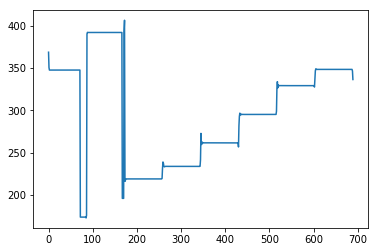

In [9]:
pitch_graph_base = np.empty(pitchesOfBase.shape[1]) #initializes empty array with dimensions of main pitches over time
pitch_graph_target = np.empty(pitchesOfTarget.shape[1])#initializes empty array with dimensions of main pitches over time

for i in range(pitchesOfBase.shape[1]):
    pitch_graph_base[i] = detect_pitch(base,sr,i,pitchesOfBase,magnitudesOfBase) #loading pitches
    
for i in range(pitchesOfTarget.shape[1]):
    pitch_graph_target[i] = detect_pitch(target,sr,i,pitchesOfTarget,magnitudesOfTarget) #loading pitches
    

data_base = pitch_graph_base
data_target = pitch_graph_target



plt.plot(data_base)
plt.show()





In [10]:
def f2midi(frequency): #frequency to midi
    if frequency == 0:
        return 10
    else:
        return int(69 + (12 * ((math.log(frequency/440)) / (math.log(2)))))

def midi2note(midi_num): #midi to note
    notes = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
    octave = int(math.floor(midi_num/12))
    index = int(midi_num % 12)
    final = notes[index] + str(octave)
    return final
    
def stepDistance(f1,f2): #calculating semi tones between frequencies
    return f2midi(f1) - f2midi(f2)


In [39]:
#notes ignore
#overlapping window frames 
#apply cross fade and pitch shift to each one
#fft -> sinusoids, addition can be done purely in sinsuodial form -> ifft

#assume song is 100 samples -> frames of 10 samples, 5 sample overlap, 0-10, 5-15, 10-20, 15-25 95-105
# -> apply crossfade to each one -> overlap-add method
#notes ignore


frame_rate = 2048
index_rate = frame_rate / 2 #rate at which indexes increase in the audio array
repeat_num = math.ceil(len(target)) / index_rate #how many times an audio array gets split up into frames
zeroes = np.zeros(1024) #buffer to increase size for audio array
target = np.append(target, zeroes) #appending target & zeroes
splitAudio = np.empty([math.ceil(repeat_num), frame_rate]) #init array
print(splitAudio.shape)


print(target)
for i in range(int(repeat_num)):
    for j in range(int(frame_rate)):
        splitAudio[i][j] = target[i * int(index_rate) + j] #filling up overlapping frames into splitAudio
        
window = signal.triang(2048) #triangle window

for i in range(int(repeat_num)):
    temp_frame = splitAudio[i]
    splitAudio[i] = np.matmul(temp_frame,window) #applying window to each overlapping frame
    
overlap(x,h,l) #x = audio, h = filter, l = overlapped zeroes
    
    


        
        



    
    
        

        
        

(348, 2048)
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.00048828  0.00146484  0.00244141 ...,  0.00244141  0.00146484
  0.00048828]


In [27]:
IPython.display.Audio(data=splitAudio, rate=sr)